In [1]:
import sys
import os
current_dir = os.path.dirname(os.path.abspath(''))
parent_dir = os.path.dirname(os.path.dirname(os.path.dirname(current_dir)))
sys.path.append(parent_dir)
import streamProps
import math

class Format:
    end = '\033[0m'
    underline = '\033[4m'

In [6]:
print(Format.underline + "COLD STREAMS" + Format.end + "(from ASPEN HYSYS)")
cold1_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 25.1662473258577, 1.2444*1e5, 9263.10098893867/3600, "R10")
cold1_In.printState()
cold1_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 71.900, 1.19669*1e5, cold1_In.M, "R11")
cold1_Out.printState()

cold2_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 45.2168871534583, 7.79509*1e5, 128786.094077211/3600, "R21")
cold2_In.printState()
cold2_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 70.0899841440960, 7.69685*1e5, cold2_In.M, "R21a")
cold2_Out.printState()

print(Format.underline + "HOT STREAMS" + Format.end + "(from ASPEN HYSYS)")
mainH2_In = streamProps.ThermoState("TP", "REFPROP::EQHYDROGEN", 73.500, 18.89976145*1e5, 20833.3333333333/3600, "F05")
mainH2_In.x_para = 0.1/(math.exp(-175/mainH2_In.T)+0.1) - 7.06*(10**-9)*(mainH2_In.T**3) \
                        + 3.42*(10**-6)*(mainH2_In.T**2) - 6.2*(10**-5)*mainH2_In.T - 0.00227
print("F05 p-H2 mole fraction: " + str(round(mainH2_In.x_para,3)))
mainH2_In.printState()
mainH2_Out = streamProps.ThermoState("TP", "REFPROP::EQHYDROGEN", 46.00, 18.89976145*1e5, mainH2_In.M, "F06")
mainH2_Out.printState()

hot_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 74.000, 29.51433*1e5, 75927.0572863826/3600, "R04a")
hot_In.printState()
hot_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 47.400, 29.43702*1e5, hot_In.M, "R05")
hot_Out.printState()

COLD STREAMS(from ASPEN HYSYS)
Stream R10
M [kg/s]    =  2.5731
P [bar]     =  1.244
T [Kelvin]  =  25.17
H [kJ/kg]   =  500.374
S [kJ/kg.K] =  23.528


Stream R11
M [kg/s]    =  2.5731
P [bar]     =  1.197
T [Kelvin]  =  71.9
H [kJ/kg]   =  998.331
S [kJ/kg.K] =  34.931


Stream R21
M [kg/s]    =  35.7739
P [bar]     =  7.795
T [Kelvin]  =  45.22
H [kJ/kg]   =  676.693
S [kJ/kg.K] =  21.717


Stream R21a
M [kg/s]    =  35.7739
P [bar]     =  7.697
T [Kelvin]  =  70.09
H [kJ/kg]   =  960.254
S [kJ/kg.K] =  26.78


HOT STREAMS(from ASPEN HYSYS)
F05 p-H2 mole fraction: 0.528
Stream F05
M [kg/s]    =  5.787
P [bar]     =  18.9
T [Kelvin]  =  73.5
H [kJ/kg]   =  1296.787
S [kJ/kg.K] =  30.354


Stream F06
M [kg/s]    =  5.787
P [bar]     =  18.9
T [Kelvin]  =  46.0
H [kJ/kg]   =  735.645
S [kJ/kg.K] =  20.671


Stream R04a
M [kg/s]    =  21.0908
P [bar]     =  29.514
T [Kelvin]  =  74.0
H [kJ/kg]   =  947.837
S [kJ/kg.K] =  21.243


Stream R05
M [kg/s]    =  21.0908
P [bar]     =  29.437
T

In [7]:
from scipy.optimize import minimize_scalar

def objective_function(x):
    return abs(cold1_In.M*(cold1_In.H-cold1_Out.H) + x*(cold2_In.H-cold2_Out.H) + hot_In.M*(hot_In.H-hot_Out.H))

res = minimize_scalar(objective_function)
massFlow2A = res.x

cold2A_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", cold2_In.T, cold2_In.P, massFlow2A, "R21A")
cold2A_In.printState()
cold2B_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", cold2_In.T, cold2_In.P, cold2_In.M-massFlow2A, "R21B")
cold2B_In.printState()

Stream R21A
M [kg/s]    =  24.3219
P [bar]     =  7.795
T [Kelvin]  =  45.22
H [kJ/kg]   =  676.693
S [kJ/kg.K] =  21.717


Stream R21B
M [kg/s]    =  11.452
P [bar]     =  7.795
T [Kelvin]  =  45.22
H [kJ/kg]   =  676.693
S [kJ/kg.K] =  21.717




In [8]:
nParallelHx = 3

lengthPFHX = 3.8896
widthPFHX  = 1.500
heightPFHX = 1.8493
volumePFHX = lengthPFHX*widthPFHX*heightPFHX

print(Format.underline + "Overall PFHX Geometry" + Format.end)
print("(based on ASPEN EDR)")
print("Length [m]  = ", lengthPFHX)
print("Width  [m]  = ", widthPFHX)
print("Height [m]  = ", heightPFHX)
print("Volume [m3] = ", round(volumePFHX,3))
print("\n")

lengthHXA     = 3.2065
widthHXA      = 1.500
heightHXA     = 1.2461
volumeHXA     = lengthHXA*widthHXA*heightHXA

print(Format.underline + "HXA Geometry" + Format.end)
print("(based on ASPEN EDR)")
print("Length [m]  = ", lengthHXA)
print("Width  [m]  = ", widthHXA)
print("Height [m]  = ", heightHXA)
print("Volume [m3] = ", round(volumeHXA,3))
print("\n")

volumeHXB     = volumePFHX - volumeHXA
lengthHXB     = lengthPFHX
widthHXB      = widthPFHX
heightHXB     = volumeHXB/(lengthHXB*widthHXB)
print(Format.underline + "HXB Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))
print("\n")

Overall PFHX Geometry
(based on ASPEN EDR)
Length [m]  =  3.8896
Width  [m]  =  1.5
Height [m]  =  1.8493
Volume [m3] =  10.79


HXA Geometry
(based on ASPEN EDR)
Length [m]  =  3.2065
Width  [m]  =  1.5
Height [m]  =  1.2461
Volume [m3] =  5.993


HXB Geometry
Length [m]  =  3.8896
Width  [m]  =  1.5
Height [m]  =  0.822
Volume [m3] =  4.796




Final HX-5 Geometry
Length [m]  =  7.5
Width  [m]  =  1.5
Height [m]  =  3.0
Volume [m3] =  33.75


HX-B Geometry
Length [m]  =  7.5
Width  [m]  =  1.5
Height [m]  =  2.467
Volume [m3] =  27.757

###### Running Simulation ######
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          9.13e-03       0.00e+00          50             49       
       2          6.44e-04       0.00e+00          99              1       
       3          2.56e-04       0.00e+00          100             1       
       4          8.83e-05       0.00e+00          101             0       
Solved in 4 iterations, number of nodes 101. 
Maximum relative residual: 8.83e-05 
Maximum boundary residual: 0.00e+00


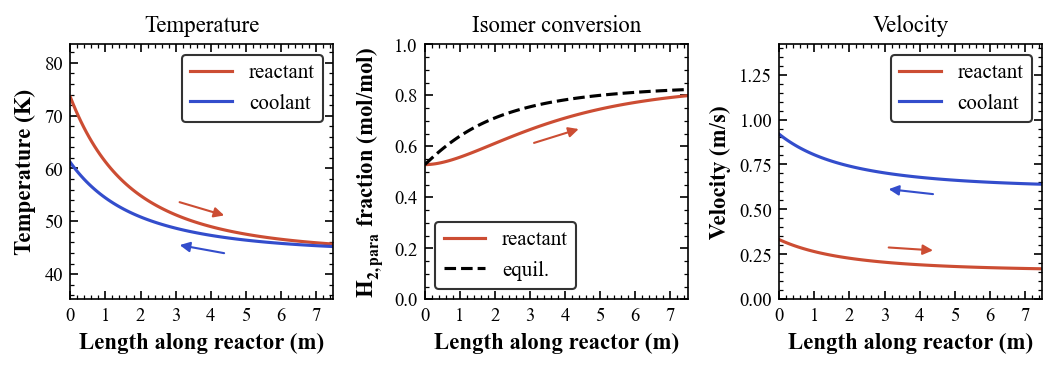

In [10]:
#Adjusted geometry
lengthPFHX = 7.500
widthPFHX = 1.500
heightPFHX = 3.000
volumePFHX = lengthPFHX*widthPFHX*heightPFHX

volumeHXB     = volumePFHX - volumeHXA
lengthHXB     = lengthPFHX
widthHXB      = widthPFHX
heightHXB     = volumeHXB/(lengthHXB*widthHXB)

# test for verifying model

### CONFIGURATION ###
configuration = {
    'reactant': {
        'mass_flow_rate': mainH2_In.M*86.4/nParallelHx, # tonne-per-day
        'x_para': mainH2_In.x_para,         # para-hydrogen fraction at inlet
        'temperature': mainH2_In.T,         # inlet temperature (K)
        'pressure': mainH2_In.P/1000        # inlet pressure (kPa)
    },
    'coolant': {
        'fluid': "Hydrogen",          # type of coolant
        'x_para': 0.25,               # normal hydrogen
        'mass_flow_rate': cold2B_In.M*86.4/nParallelHx,  # tonne-per-day
        'temperature':  cold2B_In.T,        # temperature of coolant at inlet (K)
        'pressure': cold2B_In.P/1000        # pressure of coolant at inlet (kPa)
    },
    'reactor': {
        'length': lengthHXB,                # m
        'width': widthHXB,                 # m
        'height': heightHXB,                # m
        'fin_thickness': 0.2e-3,      # m
        'fin_height': 8.9e-3,         # m
        'fin_pitch': 1.27e-3,         # m
        'seration_length': 3.0e-3,    # m
        'parting_sheet_thickness': 1.5e-3 # m
    },
    'catalyst': {
        'solid_fraction': 0.31,       # volumetric fraction of catlayst particles within reactor
        'diameter': 424.0e-6,         # mean particle diameter
        'density': 4.0                # solid density of catalyst particles (g/cm3)
    },
    'simulation': {
        'nodes': 50,                  # number of nodes across reactor length to setup
        'tolerance': 1.0e-4,          # tolerance of bvp solver
        'delta_t': 1.0                # initial guess of temperature difference between streams
    }
}

# import packages
import matplotlib
from hydrogen_pfhx import model, outputs

print(Format.underline + "Final HX-5 Geometry" + Format.end)
print("Length [m]  = ", lengthPFHX)
print("Width  [m]  = ", widthPFHX)
print("Height [m]  = ", heightPFHX)
print("Volume [m3] = ", round(volumePFHX,3))
print("\n")

print(Format.underline + "HX-B Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))

# run the model with config
print('\n###### Running Simulation ######')
results = model.model(configuration)

# plot & display results!
outputs.plot_results(results)
matplotlib.pyplot.draw()

In [ ]:
print(results)